# The Effect of Leaders on Exchange Rates

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union. We will be focusing on UK Pound Sterling vs Euro in this analysis. 

Our aim here is to analyse the data over the years when different prime ministers have lead the United Kingdom. We will see the effect different leaders have played on the exchange rate.

In [2]:
#import in modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read in data set
exchange_rates = pd.read_csv('/Users/yasmeenmahomedy2/Downloads/Datasets/euro-daily-hist_1999_2020.csv')

In [4]:
#brief look at dataset
exchange_rates.info()

exchange_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875


In [5]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5776,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5777,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5778,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5779,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5780,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


## Cleaning Data

In [6]:
#checking the uk pound sterling column data
exchange_rates.iloc[:,11]

0       0.86708
1       0.86274
2       0.86770
3       0.86838
4       0.86863
         ...   
5776    0.70940
5777    0.70585
5778    0.70760
5779    0.71220
5780    0.71110
Name: [UK pound sterling ], Length: 5781, dtype: object

In [7]:
#rename time and us dollar columns
exchange_rates.rename(columns={'[UK pound sterling ]': 'uk_pound',
                               'Period\\Unit:': 'Time'},
                      inplace=True)            

In [8]:
#change time column to datetime format
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

#sort time ascendingly
exchange_rates.sort_values('Time', inplace=True)

#reset index
exchange_rates.reset_index(drop=True, inplace=True)

In [9]:
exchange_rates['uk_pound'].head()

0    0.71110
1    0.71220
2    0.70760
3    0.70585
4    0.70940
Name: uk_pound, dtype: object

In [10]:
#isolate time and dollar columns, then assign to variable
euro_to_pound = exchange_rates[['Time' , 'uk_pound']].copy()

In [11]:
euro_to_pound

,Time,uk_pound
0,1999-01-04,0.71110
1,1999-01-05,0.71220
2,1999-01-06,0.70760
3,1999-01-07,0.70585
4,1999-01-08,0.70940
...,...,...
5776,2021-04-30,0.86863
5777,2021-05-03,0.86838
5778,2021-05-04,0.86770
5779,2021-05-05,0.86274


In [12]:
euro_to_pound['uk_pound'].value_counts()

-          62
0.87750     7
0.90430     7
0.68880     7
0.63040     7
           ..
0.91610     1
0.63030     1
0.75030     1
0.60940     1
0.88405     1
Name: uk_pound, Length: 3517, dtype: int64

There are 62 '-' characters, which we will have to remove.

In [14]:
#dropping '-' values in uk column
euro_to_pound = euro_to_pound[euro_to_pound['uk_pound'] != '-']

#convert pound column to float
euro_to_pound['uk_pound'] = euro_to_pound['uk_pound'].astype(float)

In [15]:
euro_to_pound.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      5719 non-null   datetime64[ns]
 1   uk_pound  5719 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


## Rolling Mean

We will generate a line plot to visualize the evolution of the euro-pound exchange rate. We will use a period of 30 days for the rolling mean.

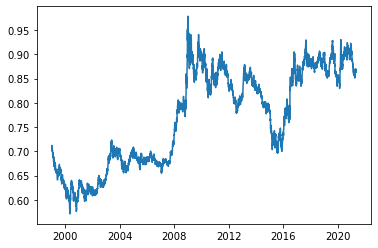

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot without rolling mean
plt.plot(euro_to_pound['Time'],
         euro_to_pound['uk_pound'])

In [22]:
#create rolling mean column in euro_to_pound column
euro_to_pound['rolling_mean'] = euro_to_pound['uk_pound'].rolling(30).mean()

In [23]:
euro_to_pound

,Time,uk_pound,rolling_mean
0,1999-01-04,0.71110,NaN
1,1999-01-05,0.71220,NaN
2,1999-01-06,0.70760,NaN
3,1999-01-07,0.70585,NaN
4,1999-01-08,0.70940,NaN
...,...,...,...
5776,2021-04-30,0.86863,0.862611
5777,2021-05-03,0.86838,0.863032
5778,2021-05-04,0.86770,0.863368
5779,2021-05-05,0.86274,0.863382


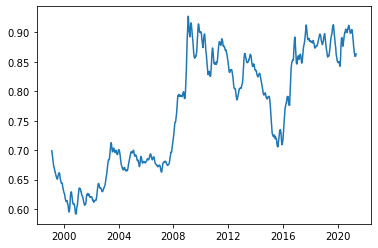

In [24]:
plt.plot(euro_to_pound['Time'] ,euro_to_pound['rolling_mean'])
plt.show()

## Plotting The Graph

The terms of the prime ministers are as follows:
* David Cameron, 11 May 2010 - 13 July 2016
* Theresa May, 13 July 2016 - 24 July 2019
* Borris Johnson, 24 July 2019 - present

In [25]:
#adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

In [26]:
#isolate data by 2016-2021 which are the years we're analysing
cam_may_jon = euro_to_pound.copy()[ (euro_to_pound['Time'].dt.year >= 2010)& (euro_to_pound['Time'].dt.year < 2021)]
cam_may_jon


,Time,uk_pound,rolling_mean
2870,2010-01-04,0.89140,0.900764
2871,2010-01-05,0.90045,0.900808
2872,2010-01-06,0.89860,0.900736
2873,2010-01-07,0.89960,0.900619
2874,2010-01-08,0.89340,0.900296
...,...,...,...
5689,2020-12-24,0.89795,0.901644
5690,2020-12-28,0.90408,0.901886
5691,2020-12-29,0.90863,0.902234
5692,2020-12-30,0.90307,0.902474


In [27]:
#isolate data by person
cam = cam_may_jon.copy()[ cam_may_jon['Time'].dt.year < 2016 ]
may = cam_may_jon.copy()[ (cam_may_jon['Time'].dt.year >= 2016) & (cam_may_jon['Time'].dt.year <2019) ]
jon = cam_may_jon.copy()[ cam_may_jon['Time'].dt.year >= 2019 ]

In [28]:
cam

,Time,uk_pound,rolling_mean
2870,2010-01-04,0.89140,0.900764
2871,2010-01-05,0.90045,0.900808
2872,2010-01-06,0.89860,0.900736
2873,2010-01-07,0.89960,0.900619
2874,2010-01-08,0.89340,0.900296
...,...,...,...
4410,2015-12-24,0.73420,0.715360
4411,2015-12-28,0.73535,0.716304
4412,2015-12-29,0.74005,0.717445
4413,2015-12-30,0.73799,0.718655


<ipython-input-29-9d5818d25124>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','2010','', '2012', '', '2014', '', '2016'], alpha=0.3)
<ipython-input-29-9d5818d25124>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'] , alpha=0.5)
<ipython-input-29-9d5818d25124>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['2016','', '','', '2017', '' ,'','', '2018'], alpha=0.3)
<ipython-input-29-9d5818d25124>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'] , alpha=0.5)
<ipython-input-29-9d5818d25124>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['','2019','', '', '2020','', '','2021'], alpha=0.3)
<ipython-input-29-9d5818d25124>:29: UserWarning: Fixe

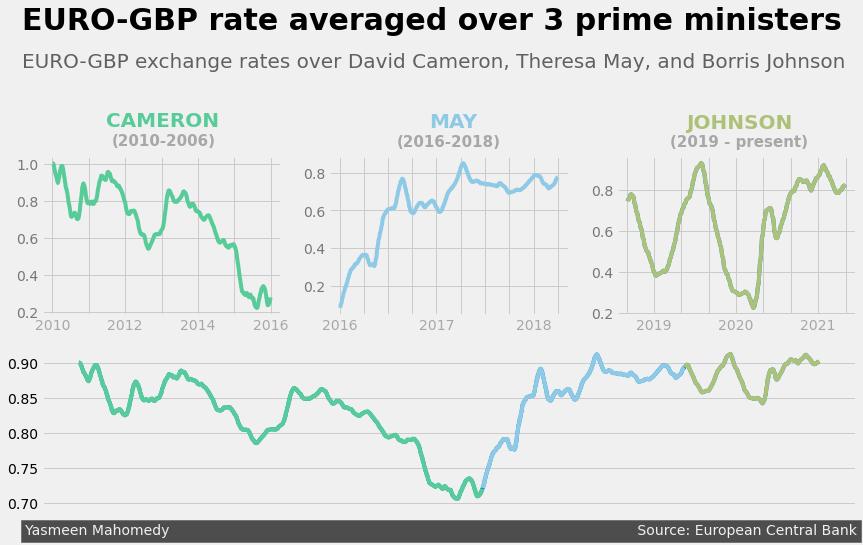

In [29]:
#grid chart layout
plt.figure(figsize = (13,6))
ax1 = plt.subplot(2,3,1)
ax2 =plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4]


#ax1 - cameron
ax1.plot(cam['Time'], cam['rolling_mean'], color= '#57cc99')
ax1.set_xticklabels(['','2010','', '2012', '', '2014', '', '2016'], alpha=0.3)
ax1.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'] , alpha=0.5)
ax1.text(15150,0.95 , 'CAMERON', size=20, weight='bold', color= '#57cc99')
ax1.text(15205,0.925 , '(2010-2006)', size=15, weight='bold', alpha=0.3)

#ax2 -  may
ax2.plot(may['Time'], may['rolling_mean'], color= '#8ecae6')
ax2.set_xticklabels(['2016','', '','', '2017', '' ,'','', '2018'], alpha=0.3)
ax2.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'] , alpha=0.5)
ax2.text(17250,0.96 , 'MAY', size=20, weight='bold', color= '#8ecae6')
ax2.text(17090,0.935 , '(2016-2018)', size=15, weight='bold', alpha=0.3)

#ax3 - johnson
ax3.plot(jon['Time'], jon['rolling_mean'])
ax3.plot(jon['Time'], jon['rolling_mean'], color= '#adc178')
ax3.set_xticklabels(['','2019','', '', '2020','', '','2021'], alpha=0.3)
ax3.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'] , alpha=0.5)
ax3.text(18095,0.93, 'JOHNSON', size=20, weight='bold', color= '#adc178')
ax3.text(18040,0.921 , '(2019 - present)', size=15, weight='bold', alpha=0.3)


#ax4 - all
ax4.plot(cam_may_jon['Time'], cam_may_jon['rolling_mean'])
ax4.plot(jon['Time'], jon['rolling_mean'], color= '#adc178')
ax4.plot(may['Time'], may['rolling_mean'], color= '#8ecae6')
ax4.plot(cam['Time'], cam['rolling_mean'], color= '#57cc99')
ax4.set_xticks([])

#main title and subtitle
ax1.text(14300,1.081, 'EURO-GBP rate averaged over 3 prime ministers', size=30, weight='bold')
ax1.text(14300,1.03, 'EURO-GBP exchange rates over David Cameron, Theresa May, and Borris Johnson', size=20, alpha=0.6)

#signature
ax4.text(14320,0.654, 'Yasmeen Mahomedy' + ' '*104 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)



plt.show()

# Conclusion

We can see duing David Cameron's leadership the value of the pound steeply dropped. This could be because of Brexit rumours. The value then picks up as Theresa May comes into office.
Borris Johnson's leadership has had a few flutuations, but this can be attributed to covid-19 which severely affected the economy since 2019. The depreciation of the pound could be linked to the first and second waves of covid-19. The UK also exited the European Union on the 1st of February 2020, which could explain the massive decrease in early 2020.